<a href="https://colab.research.google.com/github/ganonononon/kaggle_stock/blob/main/%E6%A0%AA%E4%BE%A1%E4%BA%88%E6%B8%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/train.csv')
df_test_base = pd.read_csv("/content/test2.csv")
df_submit = pd.read_csv("/content/sample_submission2.csv", header=None, names=["Date","Up"])

In [ ]:
#最終的に提出する
#200行に纏められれる
df_submit

,Date,Up
0,2012-01-26,0
1,2012-02-09,0
2,2012-02-24,0
3,2012-03-09,0
4,2012-03-23,0
...,...,...
195,2019-10-25,0
196,2019-11-08,0
197,2019-11-22,0
198,2019-12-09,0


In [ ]:
#サンプル
df

,Date,Open,High,Low,Close,Up
0,2004-01-02,50.85,50.91,50.62,50.72,1
1,2004-01-05,50.75,50.84,50.61,50.79,1
2,2004-01-06,50.87,51.26,50.86,51.15,1
3,2004-01-07,51.45,51.54,51.29,51.51,0
4,2004-01-08,51.15,51.33,51.02,51.28,0
...,...,...,...,...,...,...
2021,2012-01-11,108.62,109.00,108.41,108.86,1
2022,2012-01-12,109.68,109.90,109.44,109.83,0
2023,2012-01-13,109.53,109.72,109.08,109.66,1
2024,2012-01-17,109.99,110.47,109.57,109.96,1


In [ ]:
#Upがないためそれを予測する
df_test_base

,Date,Open,High,Low,Close
0,2012-01-19,110.79,110.82,109.96,110.39
1,2012-01-20,110.45,111.10,110.36,110.73
2,2012-01-23,110.95,111.10,109.65,110.36
3,2012-01-24,110.16,110.16,108.13,108.39
4,2012-01-25,106.25,107.11,105.97,106.89
...,...,...,...,...,...
1195,2019-12-17,185.52,186.40,184.62,184.68
1196,2019-12-18,183.86,184.01,182.38,183.10
1197,2019-12-19,183.83,185.17,183.66,185.08
1198,2019-12-20,186.29,186.64,184.81,185.19


In [ ]:
pd.concat([df["Close"], df_test_base["Close"]], axis=0).plot

<Axes: >

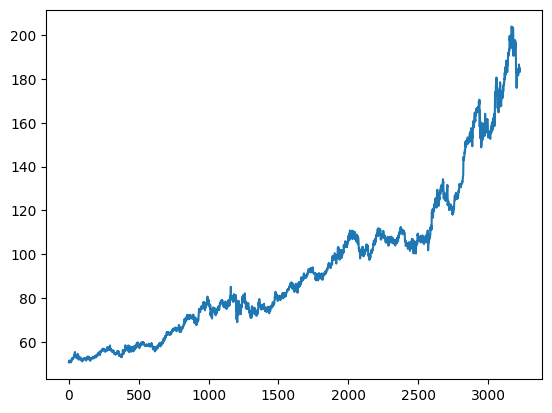

In [ ]:
#2000番目に行ってもまた0から振ってあげましょうっていうのがreset_index
#plotはデータの表示
pd.concat([df["Close"], df_test_base["Close"]], axis=0).reset_index(drop=True).plot()

In [ ]:
pd.concat([df["Close"], df_test_base["Close"]], axis=0).reset_index(drop=True)

,Close
0,50.72
1,50.79
2,51.15
3,51.51
4,51.28
...,...
3221,184.68
3222,183.10
3223,185.08
3224,185.19


In [ ]:
#データの1日の差分
df["Close"].diff(1)

,Close
0,NaN
1,0.07
2,0.36
3,0.36
4,-0.23
...,...
2021,-0.26
2022,0.97
2023,-0.17
2024,0.30


<Axes: >

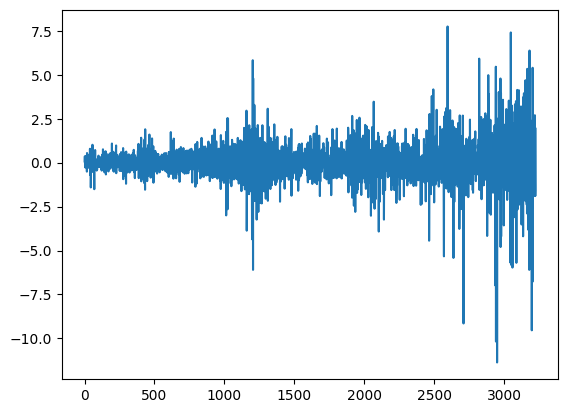

In [ ]:
pd.concat([df["Close"].diff(1), df_test_base["Close"].diff(1)], axis=0).reset_index(drop=True).plot()

In [ ]:
#shift()→一行ずらすことができる。
pd.concat([df, df["Close"].diff(1).rename("Close diff"), df["Close"].diff(1).shift(1).rename("Close_diff_1daylag")], axis=1)

,Date,Open,High,Low,Close,Up,Close diff,Close_diff_1daylag
0,2004-01-02,50.85,50.91,50.62,50.72,1,NaN,NaN
1,2004-01-05,50.75,50.84,50.61,50.79,1,0.07,NaN
2,2004-01-06,50.87,51.26,50.86,51.15,1,0.36,0.07
3,2004-01-07,51.45,51.54,51.29,51.51,0,0.36,0.36
4,2004-01-08,51.15,51.33,51.02,51.28,0,-0.23,0.36
...,...,...,...,...,...,...,...,...
2021,2012-01-11,108.62,109.00,108.41,108.86,1,-0.26,-0.43
2022,2012-01-12,109.68,109.90,109.44,109.83,0,0.97,-0.26
2023,2012-01-13,109.53,109.72,109.08,109.66,1,-0.17,0.97
2024,2012-01-17,109.99,110.47,109.57,109.96,1,0.30,-0.17


In [ ]:
df["Close"].diff(1).shift(1)

,Close
0,NaN
1,NaN
2,0.07
3,0.36
4,0.36
...,...
2021,-0.43
2022,-0.26
2023,0.97
2024,-0.17


In [ ]:
#関数化してあげる
def data_pre(df, col):
  pd.concat([df, df[col].diff(1).rename(f"{col} diff"), df[col].diff(1).shift(1).rename(f"{col}_diff_1daylag"), df[col].diff(1).shift(2).rename(f"{col}_diff_2daylag"),df[col].diff(1).shift(3).rename(f"{col}_diff_3daylag"),df[col].diff(1).shift(4).rename(f"{col}_diff_4daylag"),df[col].diff(1).shift(5).rename(f"{col}_diff_5daylag")], axis=1)
  #df = df.drop(col, axis=1)

  return df

In [ ]:
df_tmp = data_pre(df, "Close")
df_tmp

,Date,Open,High,Low,Close,Up
0,2004-01-02,50.85,50.91,50.62,50.72,1
1,2004-01-05,50.75,50.84,50.61,50.79,1
2,2004-01-06,50.87,51.26,50.86,51.15,1
3,2004-01-07,51.45,51.54,51.29,51.51,0
4,2004-01-08,51.15,51.33,51.02,51.28,0
...,...,...,...,...,...,...
2021,2012-01-11,108.62,109.00,108.41,108.86,1
2022,2012-01-12,109.68,109.90,109.44,109.83,0
2023,2012-01-13,109.53,109.72,109.08,109.66,1
2024,2012-01-17,109.99,110.47,109.57,109.96,1


In [ ]:
#学習データへの特徴量追加
df = df.drop(["Date"], axis=1)
df = data_pre(df, "Open")
df = data_pre(df, "High")
df = data_pre(df, "Low")
df = data_pre(df, "Close")


#テストデータへの特徴量追加
df_test = df_test_base.drop(["Date"], axis=1)
df_test = data_pre(df_test, "Open")
df_test = data_pre(df_test, "High")
df_test = data_pre(df_test, "Low")
df_test = data_pre(df_test, "Close")

#LightGBMを使えるようになれ

簡単に実装できる

1.xgboostの基本

2.仲間

3.使う場面

基本→ブースティングを用いる
直列に決定木を作る、どんどん深い質問を繰り返す

LightGBMの基本的な仕組みはXGBOOSTと同じだが、その名の通り軽く実装できるためん計算負荷が少ない特徴がある。

特徴1.決定木の学習方法が違う
特徴2.特徴量をヒストグラム化する

XGBBOSTは階層を合わせるleafwise,lightGBMは葉ごとの学習を行う

leafwiseは過剰適合を引き起こす、
lightGBMは階層を決めれる

制度はXGBOOSTの方が高くなることもある

CatBoostは特殊な前処理を行なっている、あまり使ってない

XGBOOSTが使える場面↓

チャーン分析→解約する顧客を予測する分析方法
解約しそうな人の対策をする、過去データを使う

オンリアンゲームの解約↓

ログイン回数、過去三ヶ月なのか、連続日数なのか、1日あたりなのか、直近なのか様々な特徴量
→これが最もデータに影響を与える

どの特徴量が効いているかも解約予測を使って可視化することができる→特徴量重要度

数字のオーダーを揃える処理が必要→標準化→XGBOOSTやlightGBMでは必要ない

In [ ]:
#モデル構築
#80%の学習データと20%の検証データに分けてあげます
#過学習→手元にあるデータだけを学習して、新たな未知のデータに対して精度が低くなる
df_train, df_val = train_test_split(df, test_size=0.2)

col = "Up"
train_y = df_train[col]
train_x = df_train.drop(col, axis=1)

val_y = df_val[col]
val_x = df_val.drop(col, axis=1)

trains = lgb.Dataset(train_x, train_y)
valids = lgb.Dataset(val_x, val_y)

params = {
    "objective": "binary",
    "metric": "binary_logloss"
}
#early_stopping→100回ごとに精度が向上しているかを確認、向上してなければstop

model = lgb.train(params, trains, valid_sets=valids, num_boost_round=1000, callbacks=[lgb.early_stopping(stopping_rounds=100)])

[LightGBM] [Info] Number of positive: 828, number of negative: 792
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000104 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1020
[LightGBM] [Info] Number of data points in the train set: 1620, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.511111 -> initscore=0.044452
[LightGBM] [Info] Start training from score 0.044452
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[3]	valid_0's binary_logloss: 0.691113


In [ ]:
predict = model.predict(df_test)

In [ ]:
#閾値を決める
threshold = 0.5

predict_list = []
for i in predict:
  if i >= threshold:
    Up = 1
  else:
    Up = 0
    predict_list.append(Up)

df_predict = pd.concat([df_test_base, pd.Series(predict_list).rename("Up")], axis=1)

In [ ]:
df_predict

,Date,Open,High,Low,Close,Up
0,2012-01-19,110.79,110.82,109.96,110.39,0.0
1,2012-01-20,110.45,111.10,110.36,110.73,0.0
2,2012-01-23,110.95,111.10,109.65,110.36,0.0
3,2012-01-24,110.16,110.16,108.13,108.39,0.0
4,2012-01-25,106.25,107.11,105.97,106.89,NaN
...,...,...,...,...,...,...
1195,2019-12-17,185.52,186.40,184.62,184.68,NaN
1196,2019-12-18,183.86,184.01,182.38,183.10,NaN
1197,2019-12-19,183.83,185.17,183.66,185.08,NaN
1198,2019-12-20,186.29,186.64,184.81,185.19,NaN


In [ ]:
df_submit = pd.merge(df_submit[["Date"]], df_predict[["Date", "Up"]], on="Date", how="left")

In [ ]:
df_submit.to_csv("submit.csv", index=False, header=False)